In [34]:
import numpy as np
import math
import pylab

In [149]:
from scipy import optimize

In [28]:
%matplotlib inline

## Метод Рунге-Кутта

In [114]:
def DiffEq(func1, func2, Y0, Z0, T, n):
    mas_y = [Y0]
    mas_z = [Z0]
    h = T/n
    for i in range(n):
        k0 =func1(i*h, mas_y[i], mas_z[i])
        l0 =func2(i*h, mas_y[i], mas_z[i])
        k1 = func1(i*h+h/2, mas_y[i]+ h*k0/2, mas_z[i] + h*l0/2)
        l1 = func2(i*h+h/2, mas_y[i]+ h*k0/2, mas_z[i] + h*l0/2)
        k2 = func1(i*h+h/2, mas_y[i]+ h*k1/2, mas_z[i] + h*l1/2)
        l2 = func2(i*h+h/2, mas_y[i]+ h*k1/2, mas_z[i] + h*l1/2)
        k3 = func1(i*h+h, mas_y[i]+ h*k2, mas_z[i] + h*l2)
        l3 = func2(i*h+h, mas_y[i]+ h*k2, mas_z[i] + h*l2)
        mas_y.append(mas_y[-1] + h*(k0 + 2*k1 + 2*k2 + k3)/6)
        mas_z.append(mas_z[-1] + h*(l0 + 2*l1 + 2*l2 + l3)/6)
    return mas_y, mas_z

Для проверки возьмем систему:
$\begin{cases}
{y' = -2z} \\
{z' =\frac{y}{2}} \\
{y(0) = 2}\\
{z(0) = 0}\\
\end{cases}$

Решим исключением переменной:

$y'' = - y$

$\lambda^2 + 1 = 0$

$|\lambda| = i$

$y = 2 cos(t)$

$z = sin(t)$

Итак, решение:

$\begin{cases}
{y = 2 cos(t)}\\
{z = sin(t)}
\end{cases}$

По теореме, так как функции непрерывные, решение единственно.

In [127]:
def func1(x, y, z):
    return -2*z

def func2(x, y, z):
    return y/2

In [143]:
def true_y(t):
    return 2*np.cos(t)

def true_z(t):
    return np.sin(t)

Посмотрим на графики приближенных решений.

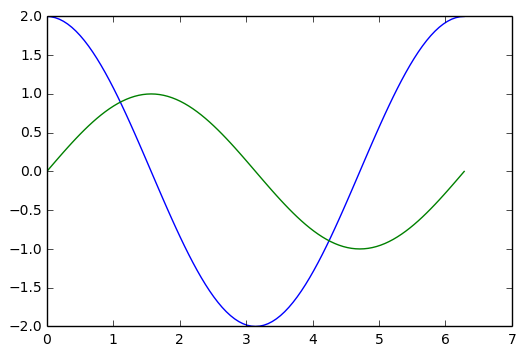

In [142]:
t = np.linspace(0, 2*np.pi, 101)
y, z = DiffEq(func1, func2, 2, 0, 2*np.pi, 100)
pylab.plot(t, y, color='blue')
pylab.plot(t, z, color='green')
pylab.show()

Заметно, что они довольно точные. Посмтрим на график логарифмов ошибок, чтобы убедиться, что при увеличении количества точек оценка становится только точнее.

In [194]:
def f(x, a, b):
    return b - a*x

def get_er(n, func1, func2, Y0, Z0, T):
    n_array = [i*10 for i in range(1, n+1)]
    n_log_array = [math.log(i*10) for i in n_array]
    er_array_y = []
    er_array_z = []
    for n in n_array:
        y, z= DiffEq(func1, func2, Y0, Z0, T, n)
        er_array_y.append(math.log(np.max(np.abs(y-2*np.cos(np.arange(n + 1)*T/n)))))
        er_array_z.append(math.log(np.max(np.abs(z-np.sin(np.arange(n + 1)*T/n)))))
    pylab.plot(n_log_array, er_array_y, color='red')
    pylab.plot(n_log_array, er_array_z)
    pylab.show()

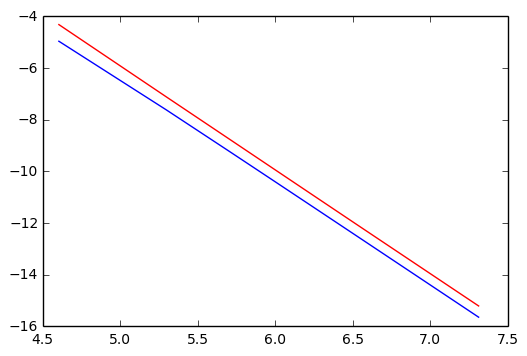

In [195]:
get_er(15, func1, func2, 2, 0, 2*np.pi)

Наклон прямой примерно -1.4, соответсвенно прядок аппроксимации -- 1.4.

$ E(h) \le C * h^{1.4}$

In [162]:
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


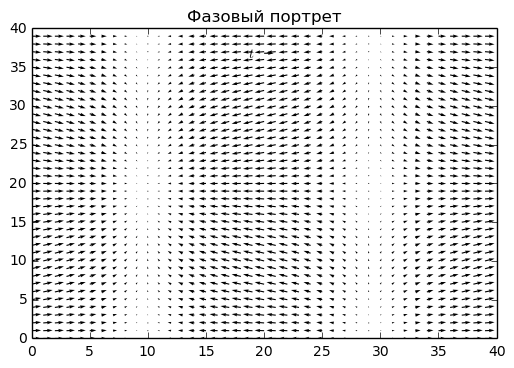

In [197]:
X, Y = np.meshgrid(np.linspace(0, 2 * np.pi, 40), np.linspace(0, 2 * np.pi, 40))
U = 2*np.cos(X)
V = np.sin(Y)/2

# 1
plt.figure()
Q = plt.quiver(U, V)
qk = plt.quiverkey(Q, 0.5, 0.92, 2, r'$t$', labelpos='W',
                   fontproperties={'weight': 'bold'})
plt.title('Фазовый портрет')